In [1]:
from datetime import datetime
import math
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
def vigenere_encrypt(plaintext, key):
    ciphertext = ""
    key = ''.join([c for c in key.upper() if c.isalpha()])
    if not key:
        raise ValueError("Key harus berisi huruf A-Z")
    plaintext_u = plaintext.upper()
    ki = 0
    for ch in plaintext_u:
        if ch.isalpha():
            shift = ord(key[ki % len(key)]) - ord('A')
            ciphertext += chr((ord(ch) - 65 + shift) % 26 + 65)
            ki += 1
        else:
            ciphertext += ch
    return ciphertext

def vigenere_decrypt(ciphertext, key):
    plaintext = ""
    key = ''.join([c for c in key.upper() if c.isalpha()])
    ki = 0
    for ch in ciphertext.upper():
        if ch.isalpha():
            shift = ord(key[ki % len(key)]) - ord('A')
            plaintext += chr((ord(ch) - 65 - shift) % 26 + 65)
            ki += 1
        else:
            plaintext += ch
    return plaintext

def print_result(mode, text, key, result, notes=""):
    print("==== Cipher Result ====")
    print("Date:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    print("Mode:", mode)
    if mode == "ENCRYPT":
        print("Plaintext:", text)
        print("Key:", key)
        print("Ciphertext:", result)
    else:
        print("Ciphertext:", text)
        print("Key:", key)
        print("Plaintext:", result)
    print("Notes:", notes)
    print("======================")


In [3]:
def letter_frequency(text):
    text = ''.join([c for c in text.upper() if c.isalpha()])
    total = len(text)
    counts = Counter(text)
    freq = {ch: counts.get(ch,0) for ch in [chr(i) for i in range(65,91)]}
    return freq, total

def index_of_coincidence(text):
    freq, total = letter_frequency(text)
    if total <= 1:
        return 0
    ic = sum(n*(n-1) for n in freq.values()) / (total*(total-1))
    return ic

def plot_frequency(text, title="Frequency"):
    freq, total = letter_frequency(text)
    letters = sorted(freq.keys())
    values = [freq[l] for l in letters]
    plt.figure(figsize=(10,4))
    plt.bar(letters, values)
    plt.title(f"{title} (total letters = {total})")
    plt.xlabel("Letter")
    plt.ylabel("Count")
    plt.show()


In [4]:
from math import gcd
from itertools import combinations

def kasiski_examination(text, min_len=3, max_len=5):
    t = ''.join([c for c in text.upper() if c.isalpha()])
    repeats = {}
    for L in range(min_len, max_len+1):
        seen = {}
        for i in range(len(t)-L+1):
            s = t[i:i+L]
            if s in seen:
                seen[s].append(i)
            else:
                seen[s] = [i]
        for s, pos in seen.items():
            if len(pos) > 1:
                repeats[s] = pos

    distances = []
    for pos in repeats.values():
        for a,b in combinations(pos,2):
            distances.append(b-a)

    gcds = Counter()
    for d in distances:
        for k in range(2, 21):
            if d % k == 0:
                gcds[k] += 1
    return repeats, distances, gcds.most_common()

def show_kasiski(text):
    repeats, distances, gcds = kasiski_examination(text)
    print("Found repeated sequences (substr -> positions):")
    for s, pos in list(repeats.items())[:20]:
        print(f" {s} -> {repeats[s]}")
    print("\nDistances (sample):", distances[:10])
    print("\nLikely key lengths (k, hits):", gcds[:10])

==== Cipher Result ====
Date: 2025-11-07 08:42:31
Mode: ENCRYPT
Plaintext: Hello World
Key: J
Ciphertext: QNUUX FXAUM
Notes: Contoh run


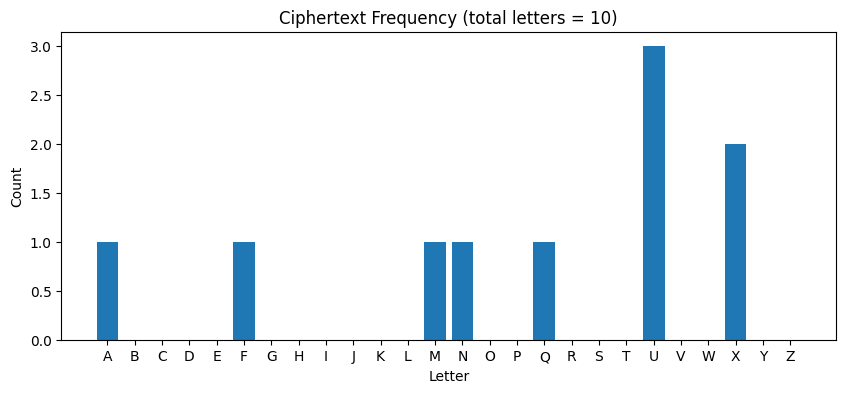

Index of Coincidence (ciphertext): 0.08888888888888889
Found repeated sequences (substr -> positions):

Distances (sample): []

Likely key lengths (k, hits): []


In [8]:
plaintext = "Hello World"
key = "J"
ciphertext = vigenere_encrypt(plaintext, key)
print_result("ENCRYPT", plaintext, key, ciphertext, notes="Contoh run")

plot_frequency(ciphertext, title="Ciphertext Frequency")
print("Index of Coincidence (ciphertext):", index_of_coincidence(ciphertext))
show_kasiski(ciphertext)
